<a href="https://colab.research.google.com/github/samarghz/my-awesome-repo/blob/main/MNIST_handwritten_Digit_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

importing the dependencies 

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import cv2 
from google.colab.patches import cv2_imshow 
from PIL import Image 
import tensorflow as tf 
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist 
from tensorflow.math import confusion_matrix 

loading the mnist data from keras.datasets

In [ ]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
type(x_train)

numpy.ndarray

In [ ]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [ ]:
print(x_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [ ]:
print(x_train[10].shape)

(28, 28)


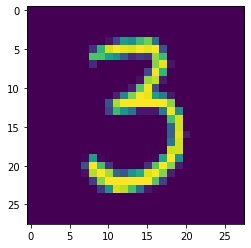

3


In [ ]:

plt.imshow(x_train[50])
plt.show()

print(y_train[50])

In [ ]:
print(y_train.shape,y_test.shape)

(60000,) (10000,)


In [ ]:

print(np.unique(y_train))

print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [ ]:
x_train=x_train/255
x_test=x_test/255

In [ ]:
print(x_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [ ]:

 model =keras.Sequential([ keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(50,activation='relu'),
                          keras.layers.Dense(50,activation='relu'),
                          keras.layers.Dense(10,activation='sigmoid')
                          ])

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy']) 

In [ ]:
model.fit(x_train,y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2983 - accuracy: 0.9138
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1368 - accuracy: 0.9591
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1025 - accuracy: 0.9682
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0836 - accuracy: 0.9745
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0683 - accuracy: 0.9788
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0601 - accuracy: 0.9809
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0509 - accuracy: 0.9839
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0452 - accuracy: 0.9863
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0403 - accuracy: 0.9865
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.034

## Training data accuracy = 98.83%

In [ ]:
loss,accuracy=model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.1051 - accuracy: 0.9699


In [ ]:
print(accuracy)

0.9699000120162964


## test data accuracy = 96.99%

In [ ]:
print(x_test.shape)

(10000, 28, 28)


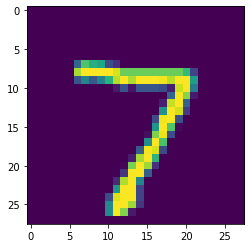

7


In [ ]:
plt.imshow(x_test[0])
plt.show()

print(y_test[0])

In [ ]:
y_pred=model.predict(x_test)

313/313 [==============================] - 1s 3ms/step


In [ ]:
print(y_pred.shape)

(10000, 10)


In [ ]:
print(y_pred[0])

[1.4374391e-03 7.1467441e-01 6.1776555e-01 6.3362604e-01 1.2592117e-04
 8.9226983e-04 1.1089677e-08 9.9999857e-01 9.5946109e-03 6.5481454e-02]


In [ ]:
label_for_first_test_image=np.argmax(y_pred[0])
print(label_for_first_test_image)


7


In [ ]:
y_pred_labels=[np.argmax(i) for i in y_pred]
print(y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 6, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 3, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 5, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 9, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 4, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 8, 8, 7, 2, 3, 0, 6, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 9, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

In [ ]:
conf_mat=confusion_matrix(y_test,y_pred_labels)

In [ ]:
print(conf_mat)

tf.Tensor(
[[ 969    1    0    1    1    1    2    2    3    0]
 [   0 1122    0    3    0    3    2    1    4    0]
 [   5    1  983    7    8    2    5    8   13    0]
 [   0    0    2  972    0   25    0    3    4    4]
 [   1    0    2    0  965    3    5    1    1    4]
 [   2    0    0    4    1  879    3    1    2    0]
 [   5    3    0    1    4   10  932    0    3    0]
 [   1    7    6    1    5    0    0  995    7    6]
 [   2    0    1    6    4   14    2    3  939    3]
 [   2    4    0    6   26   11    2    6    9  943]], shape=(10, 10), dtype=int32)


Text(0.5, 42.0, 'predicted lables')

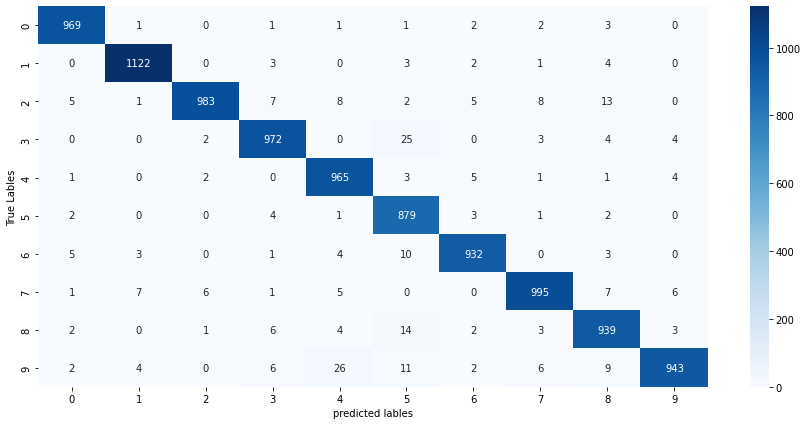

In [ ]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat,annot=True,fmt='d',cmap='Blues')
plt.ylabel('True Lables')
plt.xlabel('predicted lables') 


## building a predictive system 

In [ ]:
input_image_path='/content/MNIST_digit.png'


input_image=cv2.imread(input_image_path)


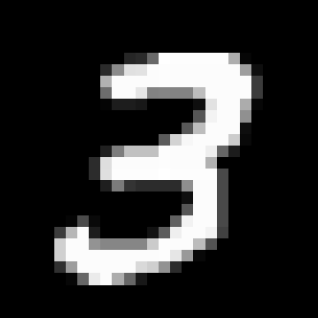

In [ ]:
cv2_imshow(input_image)

In [ ]:
input_image.shape ## rgb image 

(318, 318, 3)

converting the image from rgb to grayscale 

In [ ]:
grayscale=cv2.cvtColor(input_image,cv2.COLOR_RGB2GRAY)

In [ ]:
grayscale.shape

(318, 318)

resizing the image 

In [ ]:
input_image_resize=cv2.resize(grayscale,(28,28))

In [ ]:
input_image_resize.shape

(28, 28)

In [ ]:
cv2_imshow(input_image_resize)

In [ ]:
input_image_resize=input_image_resize/255

In [ ]:
image_reshaped=np.reshape(input_image_resize,[1,28,28])



In [ ]:
input_prediction=model.predict(image_reshaped)
print(input_prediction)

1/1 [==============================] - 0s 21ms/step
[[9.1052485e-11 6.0905391e-01 8.6273110e-05 1.0000000e+00 5.0233084e-10
  8.0084413e-01 1.6618641e-12 3.9422090e-04 9.5386732e-01 6.6479701e-01]]


In [ ]:
input_pred_label=np.argmax(input_prediction)

In [ ]:
print(input_pred_label)

3


## predictive systeme 

path of the image to be predicted:/content/MNIST_digit.png


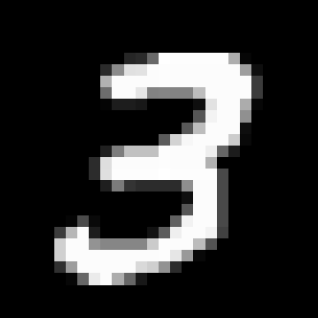

1/1 [==============================] - 0s 20ms/step
the hanfwritten digit is recognised as 3


In [ ]:
input_image_path=input('path of the image to be predicted:')

input_image=cv2.imread(input_image_path)

cv2_imshow(input_image)

grayscale=cv2.cvtColor(input_image,cv2.COLOR_RGB2GRAY)

input_image_resize=cv2.resize(grayscale,(28,28))

input_image_resize=input_image_resize/255

image_reshaped=np.reshape(input_image_resize,[1,28,28])

input_prediction=model.predict(image_reshaped)

input_pred_label=np.argmax(input_prediction)

print('the hanfwritten digit is recognised as',input_pred_label)